In [1]:
# 이미지 처리 기초
# reference: https://datascienceschool.net/view-notebook/9af8d8e93c084bc49f0ac2bb8a20e2a4/
import warnings
warnings.simplefilter("ignore")

### Color Space
# gray scale
import scipy as sp
import numpy as np
from scipy import misc
img_gray = misc.face(gray=True) 
img_gray.shape

(768, 1024)

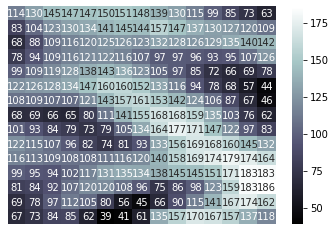

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(img_gray[:15,:15], annot=True, fmt="d", cmap=plt.cm.bone)
plt.axis("off")
plt.show()

In [3]:
# RGB
from sklearn.datasets import load_sample_images
from matplotlib import rc
rc('font', family="AppleGothic")

dataset = load_sample_images()
img_rgb = dataset.images[1]
img_rgb.shape

(427, 640, 3)

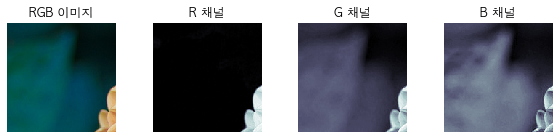

In [4]:
plt.figure(figsize=(10,2))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB 이미지")

plt.subplot(142)
plt.imshow(img_rgb[50:200, 50:200, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R 채널")

plt.subplot(143)
plt.imshow(img_rgb[50:200, 50:200, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G 채널")

plt.subplot(144)
plt.imshow(img_rgb[50:200, 50:200, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B 채널")

plt.show()

In [5]:
# HSV
from matplotlib.colors import hsv_to_rgb

V, H = np.mgrid[0:1:100j, 0:1:360j] #imaginary number: # of point
S = np.ones_like(V)

HSV_S100 = np.dstack((H, S*1.0, V))
RGB_S100 = hsv_to_rgb(HSV_S100)
HSV_S20 = np.dstack((H, S*0.2, V))
RGB_S20 = hsv_to_rgb(HSV_S20)

HSV_S20.shape

(100, 360, 3)

In [6]:
HSV_S20[:4, :5, 0] #색상(Hue)

array([[0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206]])

In [7]:
 HSV_S20[:4, :5, 1] #채도(Saturation)

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [8]:
HSV_S20[:4, :5, 2] #명도(Value)

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101],
       [0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202],
       [0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303]])

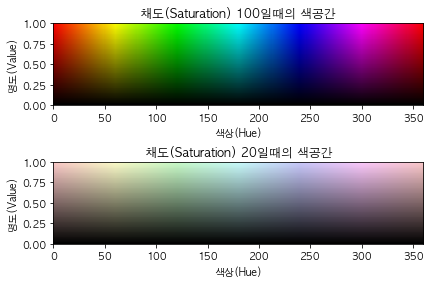

In [9]:
plt.subplot(211)
plt.imshow(RGB_S100, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 100일때의 색공간")
plt.grid(False)

plt.subplot(212)
plt.imshow(RGB_S20, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 20일때의 색공간")
plt.grid(False)

plt.tight_layout()
plt.show()

In [10]:
### 이미지 파일 형식
import PIL
PIL.__version__

'6.1.0'

In [11]:
!wget -O logo.png https://www.python.org/static/community_logos/python-logo-master-v3-TM.png

--2019-08-29 15:37:49--  https://www.python.org/static/community_logos/python-logo-master-v3-TM.png
Resolving www.python.org... 151.101.72.223
Connecting to www.python.org|151.101.72.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83564 (82K) [image/png]
Saving to: 'logo.png'

logo.png            100%[===================>]  81.61K  --.-KB/s    in 0.1s    

2019-08-29 15:37:50 (671 KB/s) - 'logo.png' saved [83564/83564]



In [12]:
from PIL import Image
img_logo_png = Image.open("./logo.png")
img_logo_png.size

(601, 203)

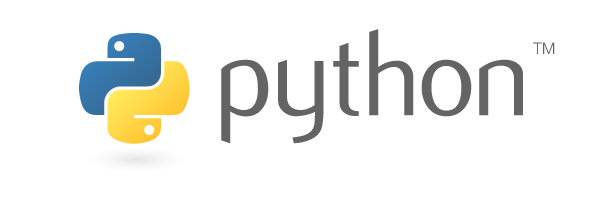

In [13]:
img_logo_png

In [14]:
img_logo_png.save("./logo.bmp")
img_logo_bmp = Image.open("./logo.bmp")

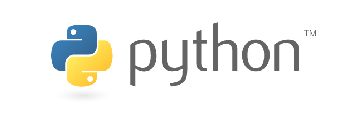

In [15]:
img_logo_array = np.array(img_logo_bmp) #Image객체 -> numpy array

plt.imshow(img_logo_array)
plt.axis("off")
plt.show()

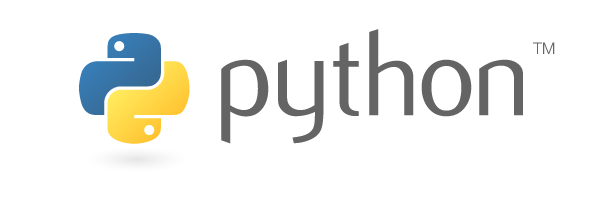

In [16]:
Image.fromarray(img_logo_array) #numpy array -> Image객체

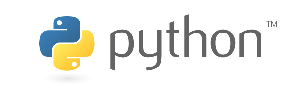

In [17]:
# 이미지 크기 변환
img_logo_png2 = img_logo_png.resize((300, 100)) 
img_logo_png2

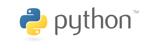

In [18]:
img_logo_thumbnail = img_logo_png.copy()  #thumbnail메서드는 원래 객체자체를 바꾸는 in-place
img_logo_thumbnail.thumbnail((150,50))
img_logo_thumbnail

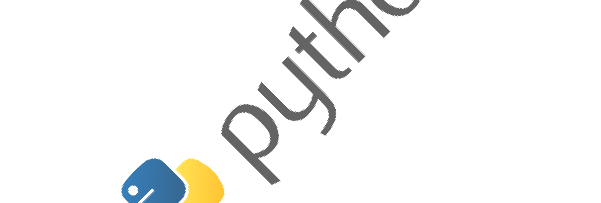

In [19]:
# 이미지 회전
img_logo_rotated = img_logo_png.rotate(45)
img_logo_rotated

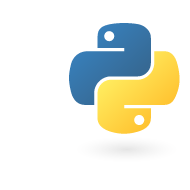

In [20]:
# 이미지 잘라내기
img_logo_cropped = img_logo_png.crop((10, 10, 200, 200)) #좌-상, 우-하 좌표
img_logo_cropped

In [21]:
### Scikit-Image
import skimage
skimage.__version__

'0.15.0'

In [22]:
import skimage.data
img_astro = skimage.data.astronaut()
img_astro.shape

(512, 512, 3)

In [23]:
# 이미지 읽고 쓰기
skimage.io.imsave("astronaut.png", img_astro)
img_astro2 = skimage.io.imread("astronaut.png")

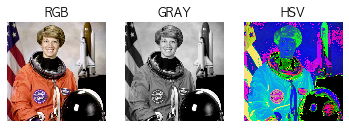

In [24]:
# 색공간 변환
from skimage import color

plt.subplot(131)
plt.imshow(img_astro)
plt.axis("off")
plt.title("RGB")

plt.subplot(132)
plt.imshow(color.rgb2gray(img_astro), cmap=plt.cm.gray)
plt.axis("off")
plt.title("GRAY")

plt.subplot(133)
plt.imshow(color.rgb2hsv(img_astro))
plt.axis("off")
plt.title("HSV")

plt.show()

In [25]:
### OpenCV
# install: conda install -c conda-forge opencv
import cv2
cv2.__version__

'3.4.2'

In [26]:
img_astro3 = cv2.imread("./astronaut.png")
img_astro3.shape

(512, 512, 3)

In [28]:
# (B-G-R) to (R-G-B)
## 채널 분리 후 다시 조합
b, g, r = cv2.split(img_astro3)
img_astro3_rgb = cv2.merge([r, g, b])

In [29]:
## cvtColor 
img_astro3_gray = cv2.cvtColor(img_astro3, cv2.COLOR_BGR2GRAY)

In [30]:
cv2.imwrite("./gray_astronaut.png", img_astro3_gray)

True

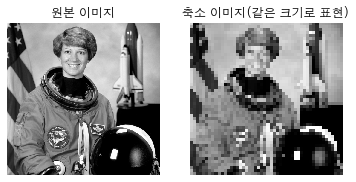

In [31]:
# 이미지 크기 변환
img_astro3_gray_resized = cv2.resize(img_astro3_gray, dsize=(50, 50))
img_astro3_gray_resized.shape

plt.subplot(121)
plt.imshow(img_astro3_gray, cmap=plt.cm.gray)
plt.title("원본 이미지")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_astro3_gray_resized, cmap=plt.cm.gray)
plt.title("축소 이미지(같은 크기로 표현)")
plt.axis("off")

plt.show()